In [1]:
# Dataset name banknote.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # It is a visualization library

df = pd.read_csv('datasets/banknotes.csv')

In [4]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


##### Separate the input and output variables

In [8]:
# input features
x = df[['Variance', 'Skewness', 'Curtosis','Entropy']]

# output labels

y = df['Class']

In [9]:
x.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [10]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

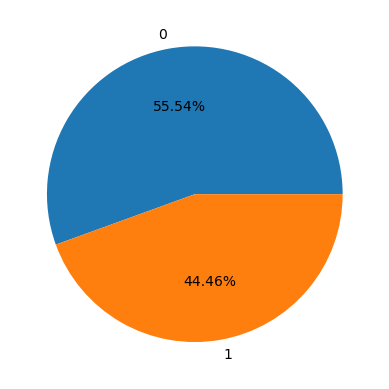

In [11]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


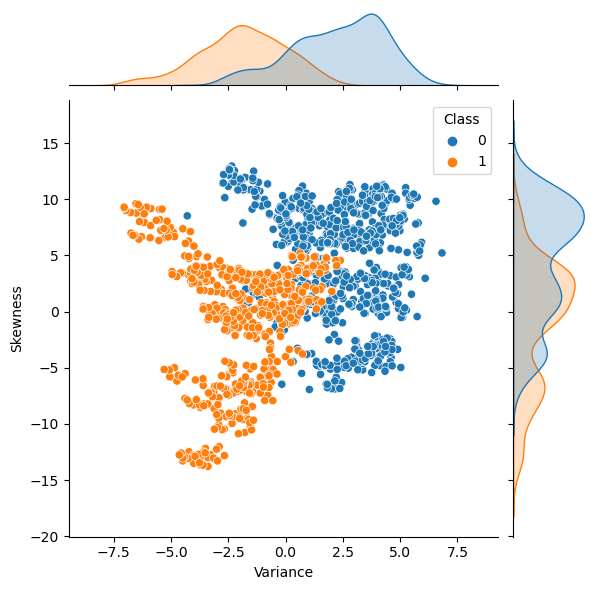

In [12]:
sns.jointplot(x='Variance', y = 'Skewness', data = df, hue = 'Class')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

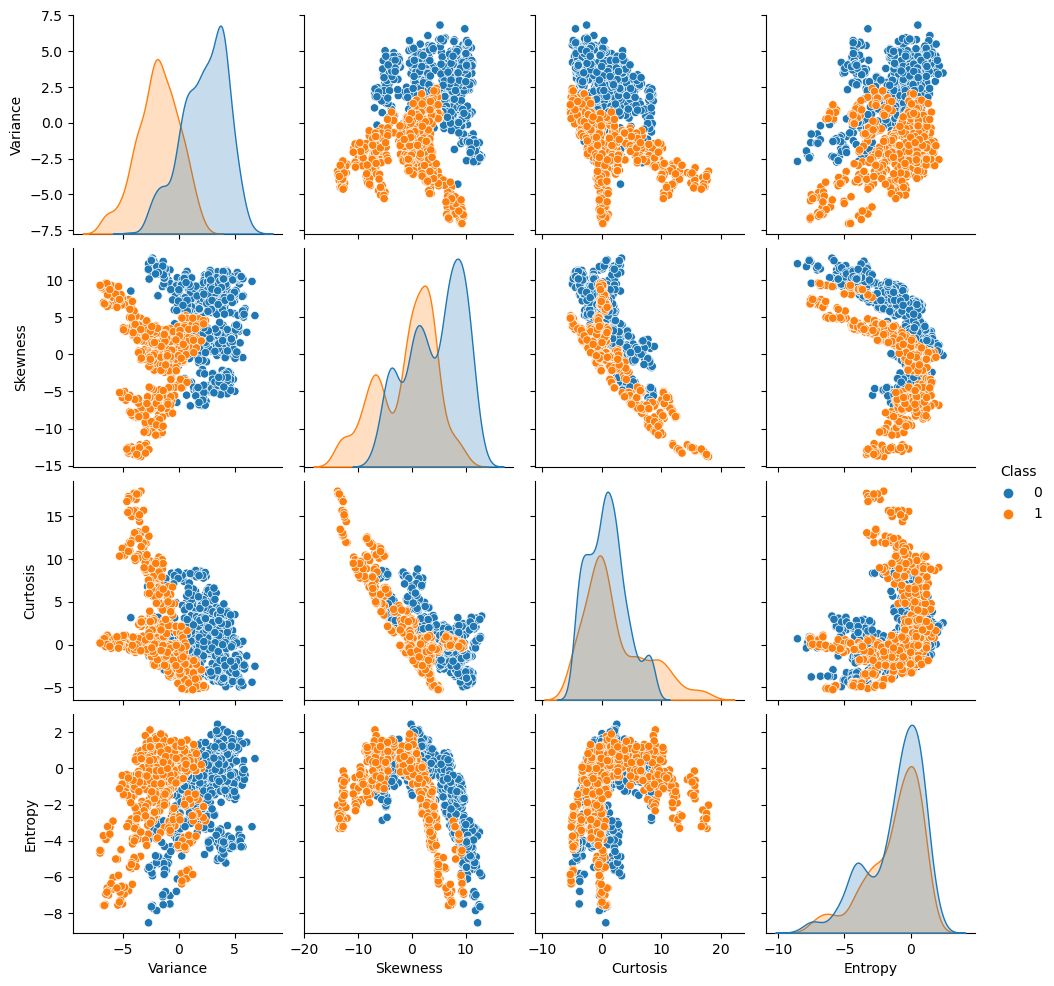

In [13]:
sns.pairplot(df, hue='Class')

### Cross Validation

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [16]:
x_train.shape

(1029, 4)

In [17]:
x_test.shape

(343, 4)

### Build the model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf_tree = DecisionTreeClassifier(random_state=0)

In [20]:
# train the algorithm
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
#### Performance evaluation

In [22]:
y_pred = clf_tree.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [25]:
print(confusion_matrix(y_test, y_pred))

[[191   4]
 [  3 145]]


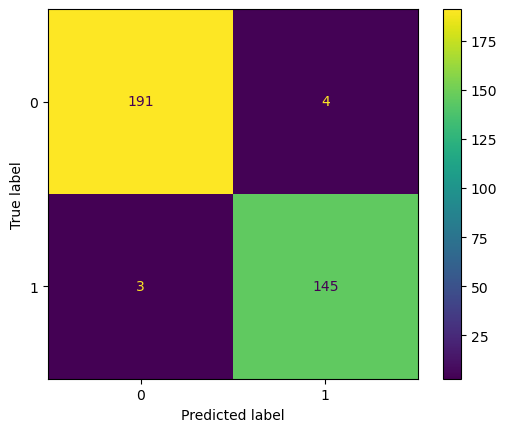

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [30]:
# Here, we check Accuracy score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



#### Visualization the tree

[Text(0.4991319444444444, 0.9444444444444444, 'x[0] <= 0.274\ngini = 0.495\nsamples = 1029\nvalue = [567, 462]'),
 Text(0.3298611111111111, 0.8333333333333334, 'x[1] <= 7.565\ngini = 0.298\nsamples = 495\nvalue = [90, 405]'),
 Text(0.22916666666666666, 0.7222222222222222, 'x[0] <= -0.471\ngini = 0.129\nsamples = 417\nvalue = [29, 388]'),
 Text(0.1111111111111111, 0.6111111111111112, 'x[2] <= 6.746\ngini = 0.061\nsamples = 349\nvalue = [11, 338]'),
 Text(0.05555555555555555, 0.5, 'x[1] <= 7.293\ngini = 0.008\nsamples = 249\nvalue = [1, 248]'),
 Text(0.027777777777777776, 0.3888888888888889, 'gini = 0.0\nsamples = 245\nvalue = [0, 245]'),
 Text(0.08333333333333333, 0.3888888888888889, 'x[3] <= -4.115\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.05555555555555555, 0.2777777777777778, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.1111111111111111, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= -4.8\ngini = 0.18\nsampl

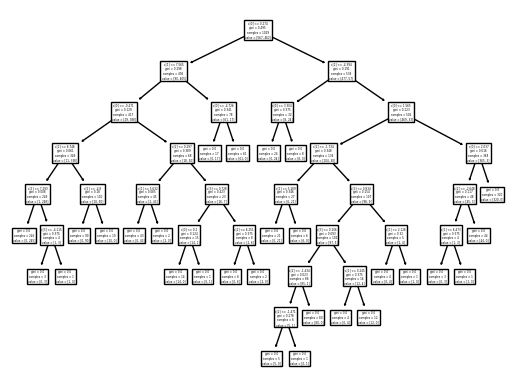

In [34]:
from sklearn.tree import plot_tree
plot_tree(clf_tree)

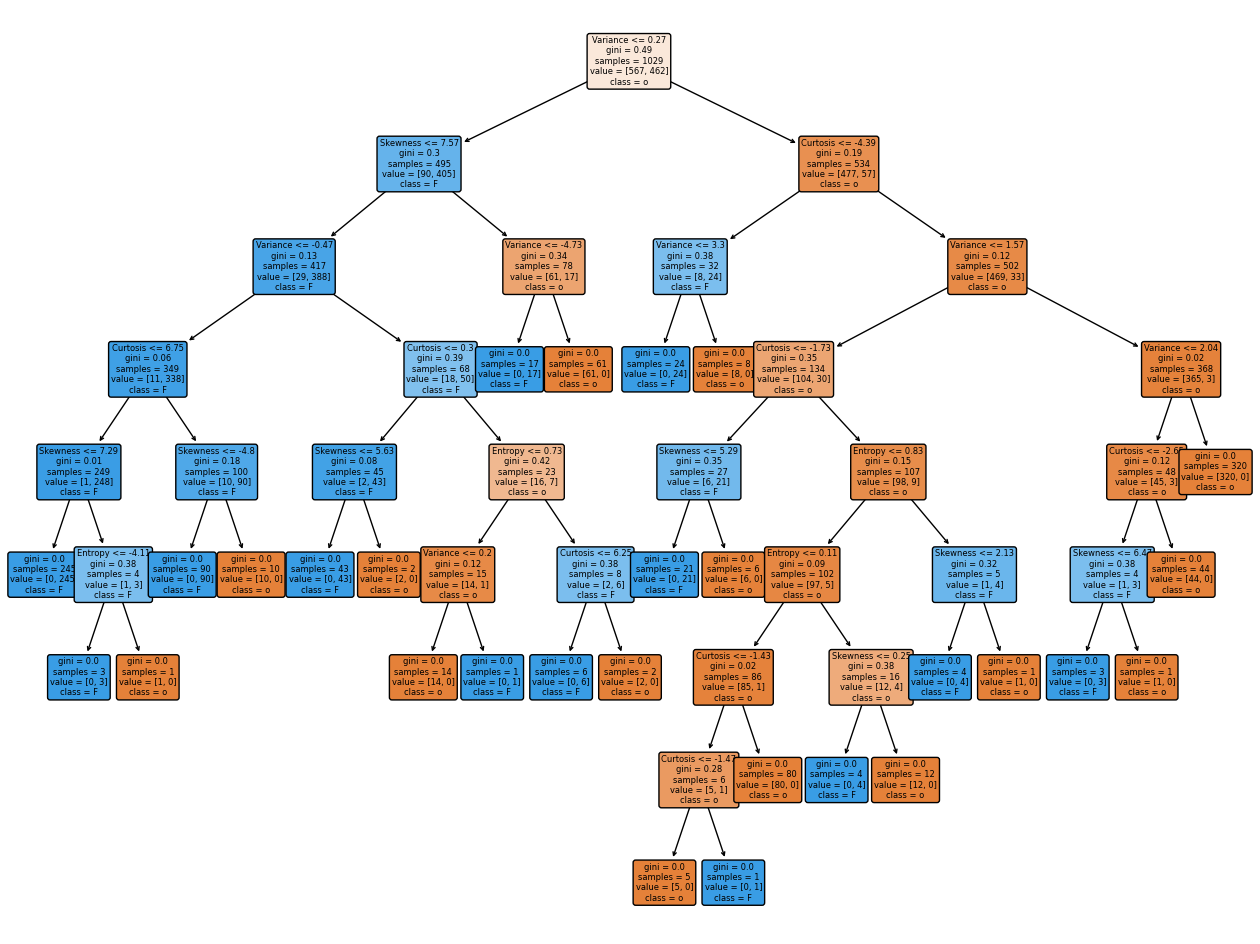

In [36]:
plt.figure(figsize=(16,12))
plot_tree(clf_tree, fontsize=6, feature_names=x.columns, filled=True, precision=2, class_names=['o','F'], rounded=True);
plt.savefig('tree.png')

<BarContainer object of 4 artists>

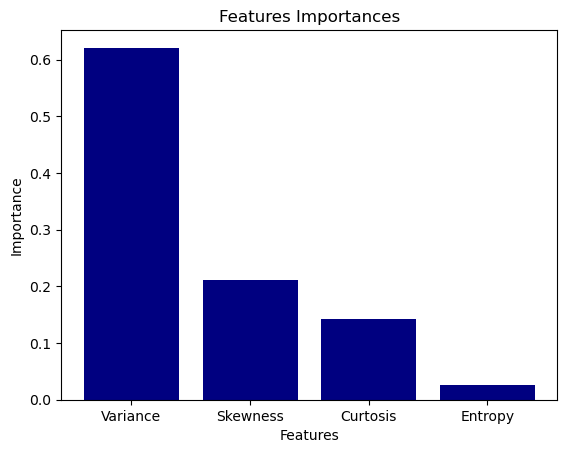

In [38]:
plt.title('Features Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns, clf_tree.feature_importances_, color='navy')

# Predi

In [44]:
v = float(input('Enter variance: '))
s = float(input('Enter skewness: '))
c = float(input('Enter curtosis: '))
e = float(input('Enter entropy: '))
data = pd.DataFrame(data=[[v,s,c,e]], columns=x.columns)
pred = clf_tree.predict(data)
if pred[0] == 0:
    print('Original Note')
else:
    print(')

Enter variance:  45
Enter skewness:  12
Enter curtosis:  12
Enter entropy:  45


Original Note


In [45]:
new = pd.DataFrame([[3.45660, 9.52280, -4.0112, -3.59440],
                   [0.40614, 1.34920, -1.4501, -0.55959],
                   [3.86600, -2.63830, 1.9242, 0.10645]],
                   columns=x.columns)

In [46]:
new

,Variance,Skewness,Curtosis,Entropy
0,3.45660,9.5228,-4.0112,-3.59440
1,0.40614,1.3492,-1.4501,-0.55959
2,3.86600,-2.6383,1.9242,0.10645


In [49]:
clf_tree.predict(new)

array([0, 1, 0], dtype=int64)

##### New data patrol consumption


In [50]:
df = pd.read_csv('datasets/petrol_consumption.csv')

In [51]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [ ]:
# input features
x = df[['Variance', 'Skewness', 'Curtosis','Entropy']]

# output labels

y = df['Petrol_Consumption']